<h1>Backpropagation</h1>

<p>The goal of Backpropagation is to find a function that we can program for our partial derivatives &part;J/&part;W<sup>(1)</sup> and &part;J/&part;W<sup>(2)</sup>. The reason we are finding two partial derivatives is because we have two layers of synaptic weights that determine our data flow. If one needed to modify their network in the future, they could simply calculate a partial derivative for each layer of weights.</p>

<p>The shape of our synaptic weight matrices determine the shape of the corresponding partial derivative matrices. Let's verify these shapes using numpy's shape function.</p>

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
inputLayerSize = 2
outputLayerSize = 1
hiddenLayerSize = 3

In [10]:
W1 = np.random.randn(inputLayerSize, hiddenLayerSize)
W1

array([[ 1.62669945,  0.05501067, -0.03700891],
       [ 1.12386771, -1.07077834,  0.75633279]])

In [11]:
W2 = np.random.randn(hiddenLayerSize, outputLayerSize)
W2

array([[-0.81128116],
       [ 0.07253303],
       [ 0.37638621]])

In [12]:
W1.shape

(2, 3)

In [13]:
W2.shape

(3, 1)

<p>So &part;J/&part;W<sup>(1)</sup> will have shape (2,3), and &part;J/&part;W<sup>(2)</sup> will have shape (3,1).</p>

<p>Our cost function so far is J = &Sigma; 1/2( y - f( f( XW<sup>(1)</sup> ) W<sup>(2)</sup> ) )<sup>2</sup>.</p>
<br>

<h2>Deriving &part;J/&part;W<sup>(2)</sup></h2>
<p>Let's work on &part;J/&part;W<sup>(2)</sup> first.</p>
<li>&part;J/&part;W<sup>(2)</sup> = &Sigma;1/2( y - yHat )<sup>2</sup></li>

<p>You may recall from your calculus classes that we have a nifty rule called the sum rule which states "the derivative of the sum is equal to the sum of the derivatives. We are going to take advantage of this property and calculate our gradients one by one, batch style, one by one and then sum them instead of accounting for the summation in our equations. This allows us to rewrite our partial derivative as...</p>
<br>
<li>&part;J/&part;W<sup>(2)</sup> = 1/2( y - yHat )<sup>2</sup></li>

<p>The second thing you may recall from your calculus classes is the power rule. Using the power rule we multiply the 1/2 by our exponent 2, and our partial derivative becomes...</p>
<br>
<li>&part;J/&part;W<sup>(2)</sup> = ( y - yHat )</li>

<p>The THIRD thing you may recall from your calculus classes is the powerful chain rule. The chain rule is somewhat more complicated than the power or summation rule of differentiation.</p>
<br>
<p>Chain Rule, f of g prime is equal to g prime times f prime of g.</p>
<li>( f o g )' = (f' 0 g ) * g'</li>

<p>ex.
<br>
d/dx( 2x + 3x<sup>3</sup> )<sup>2</sup> = 2( 2x + 3x<sup>3</sup> )( 2 + 9x<sup>2</sup> )

<p>Another way to express the chain rule is as the product of derivatives, 
<br>
dZ/dX = dZ/dY * dY/dX
<br>
This will be really helpful later.</p>

<li>&part;J/&part;W<sup>(2)</sup> = ( y - yHat )</li>
<p>In our function, the derivative of y is simply zero.</p>
<li>&part;J/&part;W<sup>(2)</sup> = ( y- yHat )</li>
<p>yHat on the other hand, changes with respect to W2, so using the chain rule and multiplying by the partial derivative of yHat, our partial derivative becomes...</p>
<br>
<li>&part;J/&part;W<sup>(2)</sup> = -( y- yHat )&part;yHat/&part;W<sup>(2)</sup></li>

<p>We need to put yHat in terms of W2. We know from our equations that yHat = 1/1+e<sup>-Z<sup>(3)</sup></sup>or, yHat = f(Z<sup>(3)</sup>. 

<p>From the chain rule, let's use the products of derivatives and rewrite our equation in terms of f(Z<sup>(3)</sup>).</p>
<br>
<li>&part;J/&part;W<sup>(2)</sup> = -( y- yHat )&part;yHat/&part;Z<sup>(3)</sup> * &part;Z<sup>(3)</sup>/&part;W<sup>(2)</sup></li>

<p>To find &part;yHat/&part;Z<sup>(3)</sup> (our second term from the products of derivatives), we need to differentiate our activaction function f(z).</p>

<li>f(z) = 1/1+e<sup>-z</sup></li>
<br>
<li>Using the division rule, f'g - g'f/g<sup>2</sup></li>
<br>
<li>f'(z) = 1<sup>u</sup>/1+e<sup>z</sup>v</li>
<br>
<li>u'v - uv' / g<sup>2</sup> = 0*v - 1*-e<sup>-z</sup> / (1+e<sup>-z</sup>)<sup>2</sup></li>
<br>
<li>f'(z) = e<sup>-z</sup> / ( 1 + e<sup>-z</sup>)<sup>2</sup>

<p>We can now replace &part;yHat/&part;Z<sup>(3)</sup> with f'(Z<sup>(3)</sup>)</p>
<br>
<li>&part;J/&part;W<sup>(2)</sup> = -( y- yHat )f'(Z<sup>(3)</sup>) * &part;Z<sup>(3)</sup>/&part;W<sup>(2)</sup></li>

<p>Now is a good time to switch back to our neural network and define a method to calculate sigmoid prime.</p>

<p>The final term we have to differentiate is &part;Z<sup>(3)</sup>/&part;W<sup>(2)</sup>.

In [14]:
#Sigmoid Function
def sigmoid(z):
     #Apply sigmoid activation function to scalar, vector, or matrix
    return 1/(1+np.exp(-z))

In [15]:
#Sigmoid' Function
def sigmoidPrime(z):
    return np.exp(-z)/((1+np.exp(-z))**2)

<p>If we implemented our derivative correctly, our sigmoidPrime function should be largest where the sigmoid function is the steepest.</p>

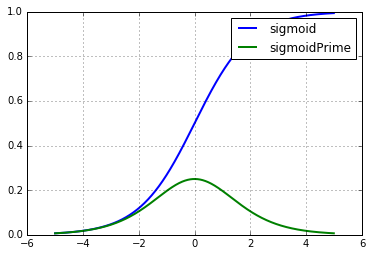

In [16]:
testValues = np.arange(-5,5,0.01)
plot(testValues, sigmoid(testValues), linewidth=2)
plot(testValues, sigmoidPrime(testValues), linewidth=2)
grid(1)
legend(['sigmoid', 'sigmoidPrime'])

<p>Looks Good!</p>

<p>We know from equation 3 that Z is dependent on a<sup>(2)</sup> and the weights from the second layer.</p>
<br>
<li>3. Z<sup>(3)</sup> = a<sup>(2)</sup>W<sup>(2)</sup></li>

<p>If we rewrite our equation as a<sup>(2)</sup> = Z<sup>(3)</sup> / W<sup>(2)</sup>, we can see that there is a linear relationship between Z and W, where a is the slope.</p> 

<p>Stephen Welch makes a great point in his tutorial on Neural Networks about what is actually happening here.</p>
<br>
<p>"Another way to think about what our calculus is doing here is that it is backpropagating the error to each weight. By multiplying by the activity on each synapse, the weights that contribute more to the overall error will have larger activations, yield larger &part;J/&part;W<sup>(2)</sup> values, and will be changed more when we perform gradient descent!</p>

In [39]:
yminusyHat = np.array((["-y-yHat"],["-y-yHat"],["-y-yHat"]))

In [40]:
Z3 = np.array((["f'(z3)"],["f'(z3)"],["f'(z3)"]))

In [41]:
delta3 = np.array((["delta3"],["delta3"],["delta3"]))

<li>&part;J/&part;W<sup>(2)</sup> = -( y- yHat )f'(Z<sup>(3)</sup>) * &part;Z<sup>(3)</sup>/&part;W<sup>(2)</sup></li>

In [42]:
yminusyHat

array([['-y-yHat'],
       ['-y-yHat'],
       ['-y-yHat']], 
      dtype='<U7')

<br>
<p>The value of -(y-yHat) * f'(Z<sup>(3)</sup>) is also referred to as the backpropagating error, &delta;<sup>(3)</sup></p>

In [43]:
Z3

array([["f'(z3)"],
       ["f'(z3)"],
       ["f'(z3)"]], 
      dtype='<U6')

In [45]:
delta3

array([['delta3'],
       ['delta3'],
       ['delta3']], 
      dtype='<U6')

<li>We determined that &part;Z<sup>(3)</sup>/&part;W<sup>(2)</sup> is the activity, a<sup>(2)</sup> of each synapse, Therefore, if we transpose a<sup>(2)</sup> and multiply by &delta;<sup>(3)</sup>, we find &part;J/&part;W<sup>(2)</sup>!
<br>
<br>
<li>&part;J/&part;W<sup>(2)</sup> = (a<sup>(2)</sup>)<sup>T</sup>&delta;<sup>(3)</sup></li>
<li>&delta;<sup>(3)</sup> = - ( y - yHat ) f '( Z<sup>(3)</sup>)</li>

<h2>Deriving &part;J/&part;W<sup>(1)</sup></h2>

<p>As you may recall, our function for &part;J/&part;W<sup>(1)</sup> is...</p>
<br>
<li>&part;J/&part;W<sup>(1)</sup> = 1/2( y - yHat )<sup>2</sup></li>

<p>We can start our derivation the same way as for &part;J/&part;W<sup>(2)</sup> = 1/2( y - yHat )<sup>2</sup> by using the power rule to get,</p>
<br>
<li>&part;J/&part;W<sup>(1)</sup> = ( y - yHat )</li>

<p>Next we apply the chain rule,</p>
<br>
<li>&part;J&part;W<sup>1</sup> = -( y - yHat )&part;yHat/&part;W<sup>(1)</sup></li>
<li>&part;J&part;W<sup>1</sup> = -( y - yHat ) * &part;yHat/&part;Z<sup>(3)</sup> * &part;yHat/&part;W<sup>(1)</sup></li>

<p>We can differentiate &part;yHat/&part;Z<sup>(3)</sup> the same way as for &part;J/&part;W<sup>(2)</sup>,</p>
<br>
<li>&part;J&part;W<sup>1</sup> = -( y - yHat ) * f '( Z<sup>(3)</sup>) * &part;yHat/&part;W<sup>(1)</sup></li>
<li>&delta;<sup>(3)</sup> = -( y - yHat ) f '(Z<sup>(3)</sup>)</li>

<p>To find the derivative across our synapses, we use the product of derivatives to get,</p>
<br>
<li>&part;J/&part;W<sup>(3)</sup> = &delta;<sup>(3)</sup> &part;Z<sup>(3)</sup>/&part;a<sup>(2)</sup> &part;a<sup>(2)</sup>/&part;W<sup>(1)</sup></li>

<p>This is different than our calculation for &part;J/&part;W<sup>(2)</sup>, because rather than a<sup>(2)</sup> being our slope, it is rather W<sup>(1)</sup> because we are trying to find the slope of &part;Z<sup>(3)</sup>/&part;a<sup>(2)</sup>.</p>
<br>
<li>Z<sup>(3)</sup> / a<sup>(2)</sup> = W<sup>(2)</sup></li>

<p>Therefore, the next step is to multiply &delta;<sup>(3)</sup> by W<sup>(2)</sup><sup>T</sup></p>
<br>
<li>&part;J/&part;W<sup>(1)</sup> = &delta;<sup>(3)</sup> ( W<sup>(2)</sup> )<sup>T</sup> &part;a<sup>(2)</sup>/&part;W<sup>(1)</sup></li>

<p>The next step is to derive &part;a<sup>(2)</sup>/&part;W<sup>(1)</sup></p>
<br>
<li>Using the product of derivatives, &part;J/&part;W<sup>(1)</sup> = &delta;<sup>(3)</sup> ( W<sup>(2)</sup> )<sup>T</sup> &part;a<sup>(2)</sup>/&part;Z<sup>(2)</sup> &part;Z<sup>(2)</sup>/&part;W<sup>(1)</sup></li>

<p>From deriving &part;J/&part;W<sup>(2)</sup>, we know that,</p>
<br>
<li>&part;a<sup>(2)</sup>/&part;Z<sup>(2)</sup> = f '( Z<sup>(2)</sup> )</li>

<p>This makes our partial derivative,</p>
<br>
<li>&part;J/&part;W<sup>(1)</sup> = &delta;<sup>(3)</sup> ( W<sup>(2)</sup> )<sup>T</sup> f '( Z<sup>(2)</sup> ) &part;Z<sup>(2)</sup>/&part;W<sup>(1)</sup></li>

<p>There is a simple linear relationship between Z<sup>(2)</sup> and W<sup>(1)</sup>, from equation 1. Z<sup>(2)</sup> = XW<sup>(1)</sup>, where the slope is simply X. Now we have all the pieces of our partial derivative!</p>
<br>
<li>&part;J/&part;W<sup>(1)</sup> = X<sup>T</sup> &delta;<sup>(3)</sup> ( W<sup>(2)</sup> )<sup>T</sup> f '( Z<sup>(2)</sup> )</li>
<li>&delta;<sup>(2)</sup> = &delta;<sup>(3)</sup> ( W<sup>(2)</sup> )<sup>T</sup> f '( Z<sup>(2)</sup> )</li>

<p>Our full list of equations becomes...</p>
<br>
<h4>Equations</h4>
<li>1. Z<sup>(2)</sup> = XW<sup>(1)</sup></li>
<li>2. a<sup>(2)</sup> = f( Z<sup>(2)</sup> )</li>
<li>3. Z<sup>(3)</sup> = a<sup>(2)</sup>W<sup>(2)</sup></li>
<li>4. yHat = f( Z<sup>(3)</sup> )</li>
<li>5. J = &Sigma;(1/2(y - yHat)<sup>2</sup>)</li>
<li>6. &part;J/&part;W<sup>(2)</sup> = (a<sup>(2)</sup>)<sup>T</sup>&delta;<sup>(3)</sup></li>
<li>7. &delta;<sup>(3)</sup> = - ( y - yHat ) f '( Z<sup>(3)</sup>)</li>
<li>8. &part;J/&part;W<sup>(1)</sup> = X<sup>T</sup> &delta;<sup>(3)</sup> ( W<sup>(2)</sup> )<sup>T</sup> f '( Z<sup>(2)</sup> )</li>
<li>9. &delta;<sup>(2)</sup> = &delta;<sup>(3)</sup> ( W<sup>(2)</sup> )<sup>T</sup> f '( Z<sup>(2)</sup> )</li>

<p>Now let's write some code for our partial derivatives. We will refer to &part;J/&part;W<sup>(1)</sup> and DJDW1, and &part;J/&part;W<sup>(2)</sup> as DJDW2.</p>

<p>&part;J/&part;W<sup>(1)</sup> = X<sup>T</sup> &delta;<sup>(3)</sup> ( W<sup>(2)</sup> )<sup>T</sup> f '( Z<sup>(2)</sup> ). We can represent this in python as,</p>

dJdW1 = np.dot(X.T, delta2)

delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)

dJdW2 = np.dot(self.a2.T, delta3)

delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))

<p>The full Neural Network Class with changes to the cost function...</p>

In [48]:
# Whole Class with additions:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2

<p>"We can now find DJDW, which will tell us which way is downhill in our 9 dimensional optimization space."</p>

In [51]:
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = np.array(([75], [82], [93]), dtype=float)

In [52]:
X = X/np.amax(X, axis=0)
y = y/100 #Max test score is 100

In [53]:
NN = Neural_Network()

In [54]:
cost1 = NN.costFunction(X,y)

In [55]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)

In [56]:
dJdW1

array([[ 0.027215  , -0.03531832, -0.00332894],
       [ 0.01781333, -0.02629399, -0.00206227]])

In [57]:
dJdW2

array([[-0.10995249],
       [-0.04718561],
       [-0.08712708]])

<p>"If we move this way by adding a scalar times our derivative to all of our weights, our cost will increase."</p>

In [58]:
scalar = 3
NN.W1 = NN.W1 + scalar*dJdW1
NN.W2 = NN.W2 + scalar*dJdW2
cost2 = NN.costFunction(X,y)

In [59]:
cost1

0.16769794244942476

In [60]:
cost2

0.25152474664167762

<p>"If we do the opposite, subtract our gradient from our weights, we will reduce our cost."</p>

In [61]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)
NN.W1 = NN.W1 - scalar*dJdW1
NN.W2 = NN.W2 - scalar*dJdW2
cost3 = NN.costFunction(X, y)

In [62]:
cost2

0.25152474664167762

In [63]:
cost3

0.1511650470897761

<h1>Numerical Gradient Checking</h1>

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<p>Now that we found the rate of change of our cost function, we need a way to check for errors in our code. If we are going to modify our network in the future such as use a different cost function or optimization method, we need a way to make sure our gradients are still being calculated correctly. One way we can do this is by using the definition of the derivative to error check our gradients.</p>

<p>Definition of the derivative:
<br>
f '(x) = lim<sub>&Delta;x&#8594;0</sub> f( x + &Delta;x ) - f( x ) / &Delta;x</p>

<p>The definition of the derivative is really just a glorified slope formula, where the top part is the change in y, and the bottom is &Delta;x.</p>

<p>By modifying the formula for the derivative somewhat, we can use it to test our gradients. If we use a reasonably small value for delta, or in our case epsilon, we can find the values around our gradient and compare them to the actual derivative.</p>

In [2]:
def f(x):
    return x**2

In [3]:
epsilon = 1e-4
x = 1.5

In [4]:
numericalGradient = (f(x+epsilon)- f(x-epsilon))/(2*epsilon)

In [5]:
numericalGradient, 2*x

(2.9999999999996696, 3.0)

<p>Looks close enough for me!</p>

<p>Stephen Welch wrote a great method for iteratively calculating the numerical gradient for each of the gradients in our network, let's test this method.</p>

In [64]:
def computeNumericalGradient(N, X, y):
        paramsInitial = N.getParams()
        numgrad = np.zeros(paramsInitial.shape)
        perturb = np.zeros(paramsInitial.shape)
        e = 1e-4

        for p in range(len(paramsInitial)):
            #Set perturbation vector
            perturb[p] = e
            N.setParams(paramsInitial + perturb)
            loss2 = N.costFunction(X, y)
            
            N.setParams(paramsInitial - perturb)
            loss1 = N.costFunction(X, y)

            #Compute Numerical Gradient
            numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
            perturb[p] = 0
            
        #Return Params to original value:
        N.setParams(paramsInitial)

        return numgrad 

In [1]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [8]:
NN = Neural_Network()

In [10]:
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = np.array(([75], [82], [93]), dtype=float)

In [12]:
X = X/np.amax(X, axis=0)
y = y/100 #Max test score is 100

In [13]:
numgrad = computeNumericalGradient(NN, X, y)
numgrad

array([-0.00108001, -0.00374748, -0.00122262,  0.0005342 ,  0.00248294,
        0.00102226,  0.00098104,  0.00032143, -0.00083862])

In [14]:
grad = NN.computeGradients(X,y)
grad

array([-0.00108001, -0.00374748, -0.00122262,  0.0005342 ,  0.00248294,
        0.00102226,  0.00098104,  0.00032144, -0.00083862])

<p>By using numpy's built in norm method, we can calculate the difference between our calculations for the gradient, and the numerical gradient.</p>

In [15]:
norm(grad-numgrad)/norm(grad+numgrad)

7.7048508867996125e-09

<p>If this value is extremely small, then we know our gradients are being calculated correctly.</p>